In [21]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.ticker as mticker
import datetime as dt
import numpy as np


In [22]:
# Connection settings
user = 'root'
password = 'password'
host = 'localhost'
port = '3306'
database = 'db'
connection = mysql.connector.connect(user=user, password=password, host=host, port=port, database=database, use_pure=True)
engine = create_engine(f'mysql://{user}:{password}@{host}:{port}/{database}')

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


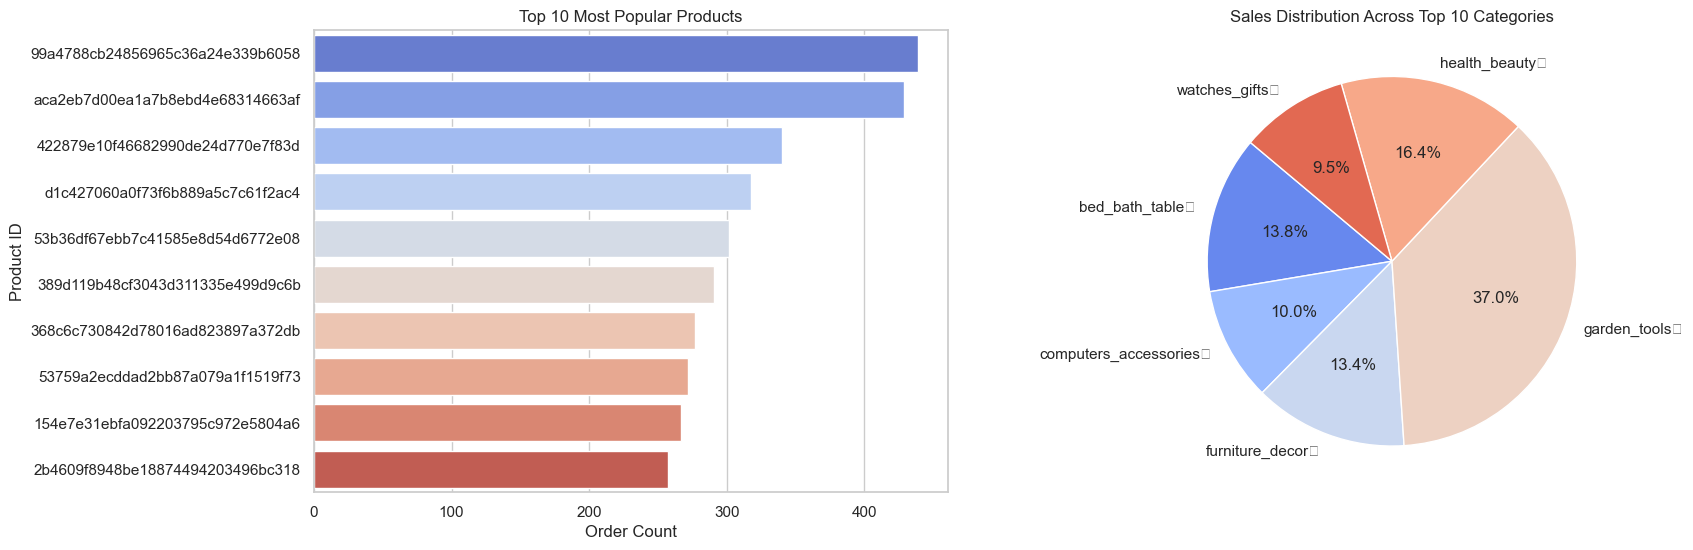

In [23]:
query_top_products = """
    SELECT 
        p.product_id,
        ct.product_category_name_english,
        COUNT(oi.order_id) as order_count
    FROM 
        products p
    JOIN 
        order_items oi ON p.product_id = oi.product_id
    JOIN
        Category_translation ct ON p.product_category_name = ct.product_category_name
    GROUP BY 
        ct.product_category_name_english, p.product_id
    ORDER BY 
        order_count DESC
    LIMIT 10;
    """
df = pd.read_sql_query(query_top_products, engine)

    
# Bar chart for top products
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(y='product_id', x='order_count', data=df,  palette='coolwarm', ax=ax[0])
ax[0].set_xlabel('Order Count')
ax[0].set_ylabel('Product ID')
ax[0].set_title('Top 10 Most Popular Products')

# Pie chart for top categories
category_counts = df.groupby('product_category_name_english')['order_count'].sum().reset_index()
category_counts.set_index('product_category_name_english', inplace=True)
category_counts['order_count'].plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax[1])
ax[1].set_ylabel('')  # This removes 'order_count' from the y-axis
ax[1].set_title('Sales Distribution Across Top 10 Categories')
plt.show(fig)
plt.clf()
print(df.style.set_properties(subset=['product_category_name_english', 'product_id'], **{'width': '300px'}))


<Figure size 640x480 with 0 Axes>

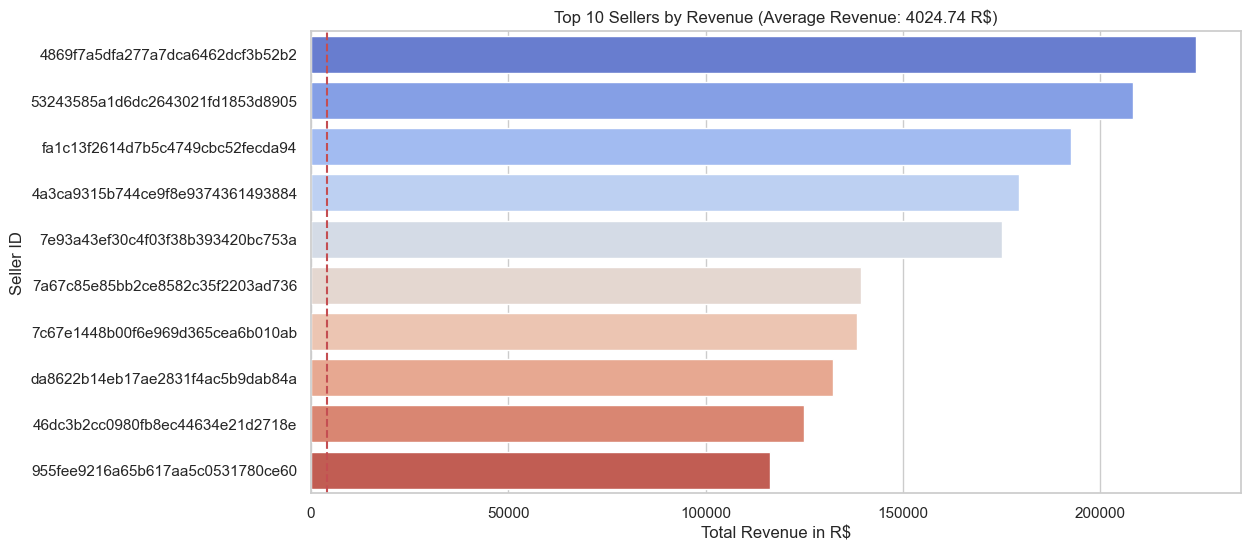

**Average Revenue for All Sellers: 4024.74 R$**
                          seller_id  total_revenue
0  4869f7a5dfa277a7dca6462dcf3b52b2      224336.15
1  53243585a1d6dc2643021fd1853d8905      208199.61
2  fa1c13f2614d7b5c4749cbc52fecda94      192480.93
3  4a3ca9315b744ce9f8e9374361493884      179367.77
4  7e93a43ef30c4f03f38b393420bc753a      174958.93
5  7a67c85e85bb2ce8582c35f2203ad736      139450.74
6  7c67e1448b00f6e969d365cea6b010ab      138471.28
7  da8622b14eb17ae2831f4ac5b9dab84a      132372.59
8  46dc3b2cc0980fb8ec44634e21d2718e      125040.39
9  955fee9216a65b617aa5c0531780ce60      116438.33


In [24]:
query_top_sellers = """
    SELECT 
        s.seller_id,
        SUM(oi.price) as total_revenue
    FROM 
        sellers s
    JOIN 
        order_items oi ON s.seller_id = oi.seller_id
    GROUP BY 
        s.seller_id
    ORDER BY 
        total_revenue DESC
    LIMIT 10;
    """
df_top_sellers = pd.read_sql_query(query_top_sellers, engine)

# Query for average revenue for all sellers
query_avg_revenue = """
    SELECT 
        AVG(total_revenue) as avg_revenue
    FROM 
        (SELECT 
            s.seller_id, 
            SUM(oi.price) as total_revenue
        FROM 
            sellers s
        JOIN 
            order_items oi ON s.seller_id = oi.seller_id
        GROUP BY 
            s.seller_id) subquery
    """
avg_revenue = pd.read_sql_query(query_avg_revenue, engine).iloc[0]['avg_revenue']

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='total_revenue', y='seller_id', data=df_top_sellers, palette='coolwarm', ax=ax)
ax.axvline(avg_revenue, color='r', linestyle='--')  # Adding a vertical line for average revenue
plt.xlabel('Total Revenue in R$')
plt.ylabel('Seller ID')
plt.title(f'Top 10 Sellers by Revenue (Average Revenue: {avg_revenue:.2f} R$)')
    
plt.show(fig)
plt.clf()
print(f'**Average Revenue for All Sellers: {avg_revenue:.2f} R$**')
print(df_top_sellers)

<Figure size 640x480 with 0 Axes>

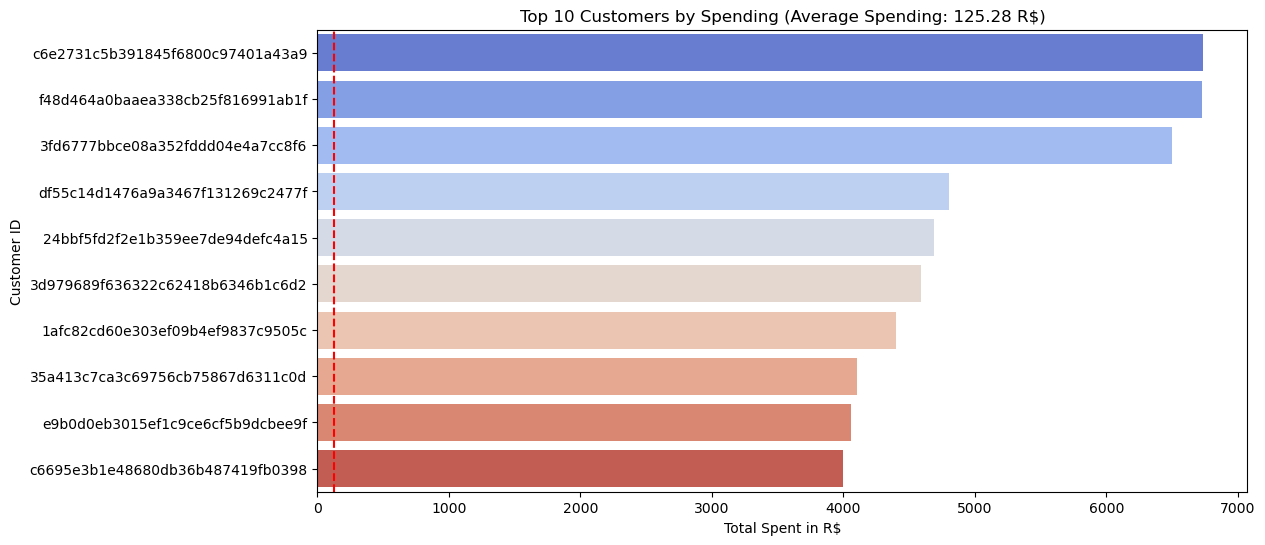

**Average Spending for All Customers: 125.28 R$**
                        customer_id  total_spent
0  c6e2731c5b391845f6800c97401a43a9      6735.00
1  f48d464a0baaea338cb25f816991ab1f      6729.00
2  3fd6777bbce08a352fddd04e4a7cc8f6      6499.00
3  df55c14d1476a9a3467f131269c2477f      4799.00
4  24bbf5fd2f2e1b359ee7de94defc4a15      4690.00
5  3d979689f636322c62418b6346b1c6d2      4590.00
6  1afc82cd60e303ef09b4ef9837c9505c      4399.87
7  35a413c7ca3c69756cb75867d6311c0d      4099.99
8  e9b0d0eb3015ef1c9ce6cf5b9dcbee9f      4059.00
9  c6695e3b1e48680db36b487419fb0398      3999.90


In [12]:
query_top_customers = """
    SELECT 
        o.customer_id, 
        SUM(oi.price) as total_spent
    FROM 
        orders o
    JOIN 
        order_items oi ON o.order_id = oi.order_id
    GROUP BY 
        o.customer_id
    ORDER BY 
        total_spent DESC
    LIMIT 10;
    """
df_top_customers = pd.read_sql_query(query_top_customers, engine)

# Query for average spending for all customers
query_avg_spent = """
    SELECT 
        AVG(total_spent) as avg_spent
    FROM 
        (SELECT 
            o.customer_id, 
            SUM(oi.price) as total_spent
        FROM 
            orders o
        JOIN 
            order_items oi ON o.order_id = oi.order_id
        GROUP BY 
            o.customer_id) subquery
    """
avg_spent = pd.read_sql_query(query_avg_spent, engine).iloc[0]['avg_spent']
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='total_spent', y='customer_id', data=df_top_customers, palette='coolwarm', ax=ax)
ax.axvline(avg_spent, color='r', linestyle='--')  # Add vertical line for average spending
plt.xlabel('Total Spent in R$')
plt.ylabel('Customer ID')
plt.title(f'Top 10 Customers by Spending (Average Spending: {avg_spent:.2f} R$)')
    
plt.show(fig)
plt.clf()
print(f'**Average Spending for All Customers: {avg_spent:.2f} R$**')
print(df_top_customers)

 

<Figure size 640x480 with 0 Axes>

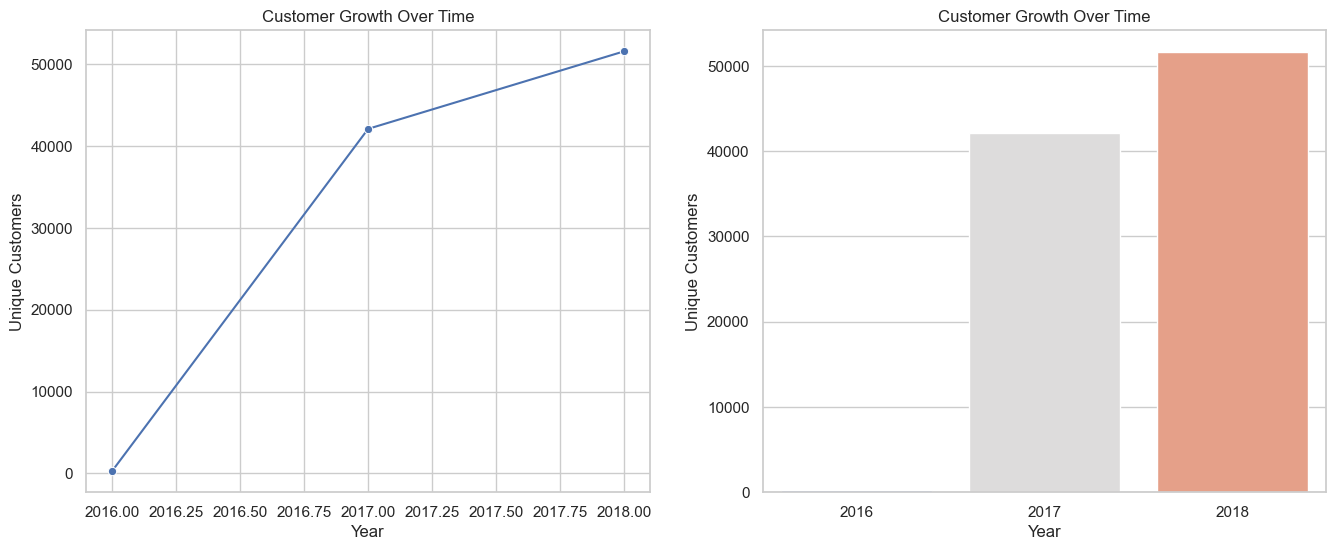

   year  unique_customers
0  2016               269
1  2017             42120
2  2018             51607


In [25]:
query_customer_count = """
    SELECT 
        EXTRACT(YEAR FROM o.order_purchase_timestamp) AS year,
        COUNT(DISTINCT c.customer_unique_id) AS unique_customers
    FROM 
        orders o
    JOIN 
        customers c ON o.customer_id = c.customer_id
    WHERE 
        EXTRACT(YEAR FROM o.order_purchase_timestamp) BETWEEN 2016 AND 2018
    GROUP BY 
        year
    ORDER BY 
        year; 
    """

df_customer_count = pd.read_sql_query(query_customer_count, engine)
     
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16,6))  # 1 row, 2 columns

sns.lineplot(x='year', y='unique_customers', data=df_customer_count, palette='coolwarm', marker='o', ax=axes[0])
axes[0].set_title('Customer Growth Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Unique Customers')

sns.barplot(x='year', y='unique_customers', data= df_customer_count, palette='coolwarm', ax=axes[1])
axes[1].set_title('Customer Growth Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unique Customers')
    
plt.show(fig)
print(df_customer_count)

C:\Users\t_bal\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Order Completion Rate
The Olist Store has a very sucessfull completion rate overall. Betweem 2016 and 2018  about 96.455 orders were delivered with just 6 being cancelled


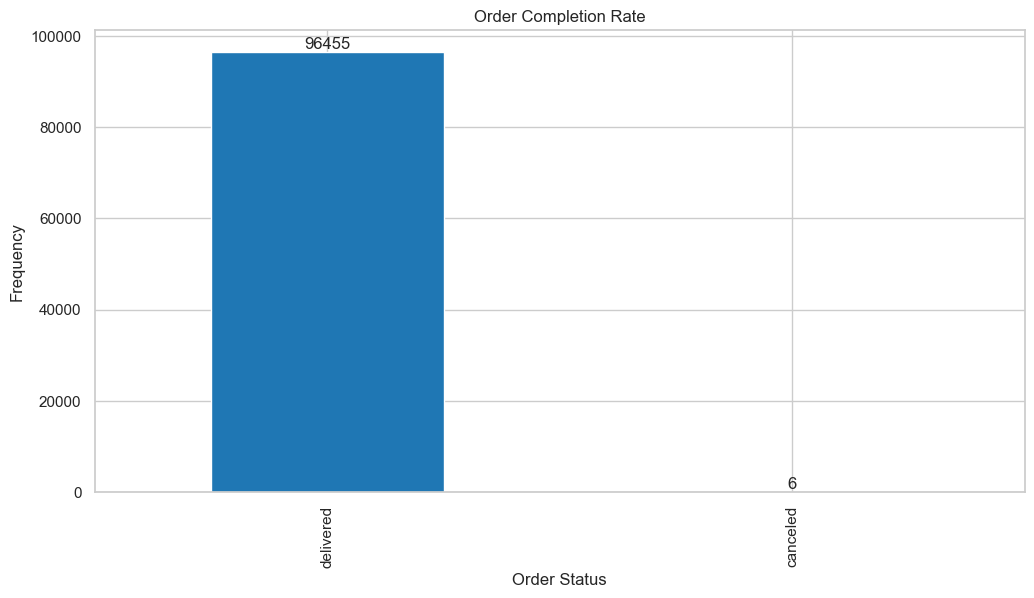

In [26]:
query_orders = "SELECT*FROM orders"
df_orders = pd.read_sql_query(query_orders,connection)
print('Order Completion Rate')

order_status_count = df_orders['order_status'].value_counts()

fig, ax = plt.subplots(figsize=(12,6)) # Adjust the size here
bars = order_status_count.plot(kind='bar', ax=ax, color='#1f77b4') # Changed color to a hex code
ax.set_title('Order Completion Rate')
ax.set_xlabel('Order Status')
ax.set_ylabel('Frequency')
print("The Olist Store has a very sucessfull completion rate overall. Betweem 2016 and 2018  about 96.455 orders were delivered with just 6 being cancelled")
    
# Add data labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom')
    
plt.show(fig)
plt.clf()



C:\Users\t_bal\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


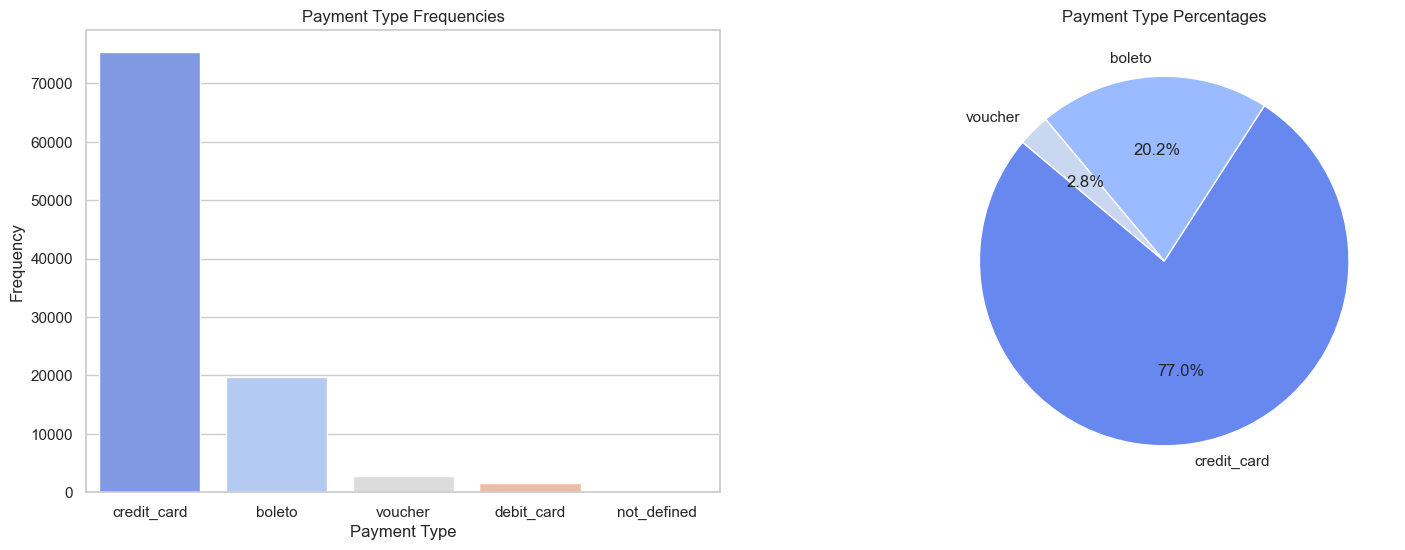

The table above us displays the distribution of payment methods used by the clients between 2016 and 2018.The most commonly used payment method was credit card, with a total count of 75,387 transactions. This indicates that credit card payments were the preferred choice among the clients
The second most popular payment method was boleto, with a count of 19,784 transactions. Boleto is a widely used payment method in Brazil, allowing customers to generate a payment slip and pay offline via banks or authorized agents


In [20]:
query_orderpayments = "SELECT * FROM order_payments"
df_orderpayments = pd.read_sql_query(query_orderpayments, connection)


if not df_orderpayments.empty:
    payment_counts = df_orderpayments['payment_type'].value_counts()
    payment_percentages = payment_counts / payment_counts.sum() * 100
    payment_percentages = payment_percentages.loc[['credit_card', 'boleto', 'voucher']]

    # Creating a figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
        
    # Vertical bar plot for Payment Type Frequencies
    sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm', ax=ax[0])
    ax[0].set_title('Payment Type Frequencies')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel('Payment Type')

    # Pie chart for Payment Type Percentages
    ax[1].pie(payment_percentages, labels=payment_percentages.index, autopct='%1.1f%%', startangle=140)
    ax[1].set_title('Payment Type Percentages')

    plt.show(fig)
    print("The table above us displays the distribution of payment methods used by the clients between 2016 and 2018.The most commonly used payment method was credit card, with a total count of 75,387 transactions. This indicates that credit card payments were the preferred choice among the clients")
    print("The second most popular payment method was boleto, with a count of 19,784 transactions. Boleto is a widely used payment method in Brazil, allowing customers to generate a payment slip and pay offline via banks or authorized agents")
    
else:
    print("No data to display for Payment Type.")
